In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Reading and Visualization Data 

In [3]:
df = pd.read_csv('clinical_records.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape

(299, 13)

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

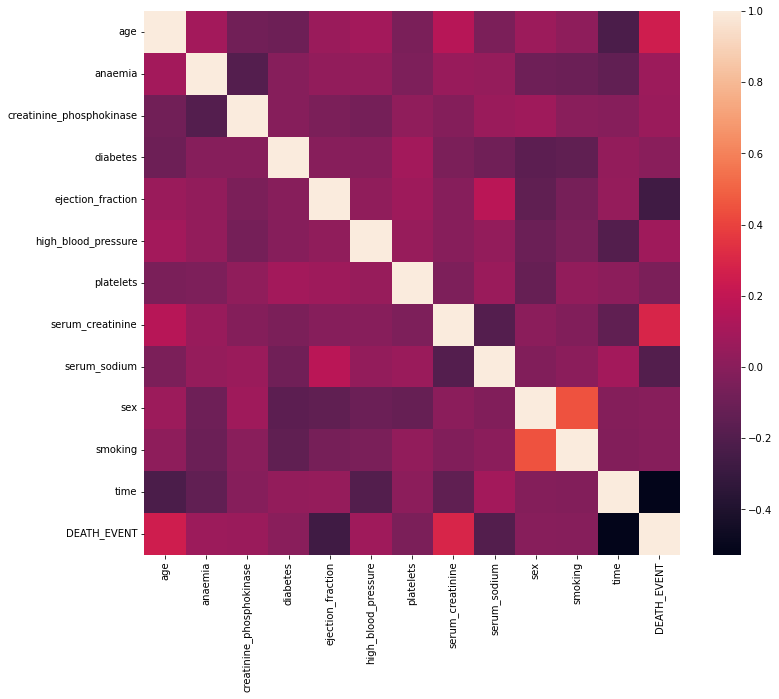

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr())

C:\Users\Admin\AppData\Local\Temp/ipykernel_3084/2555487093.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


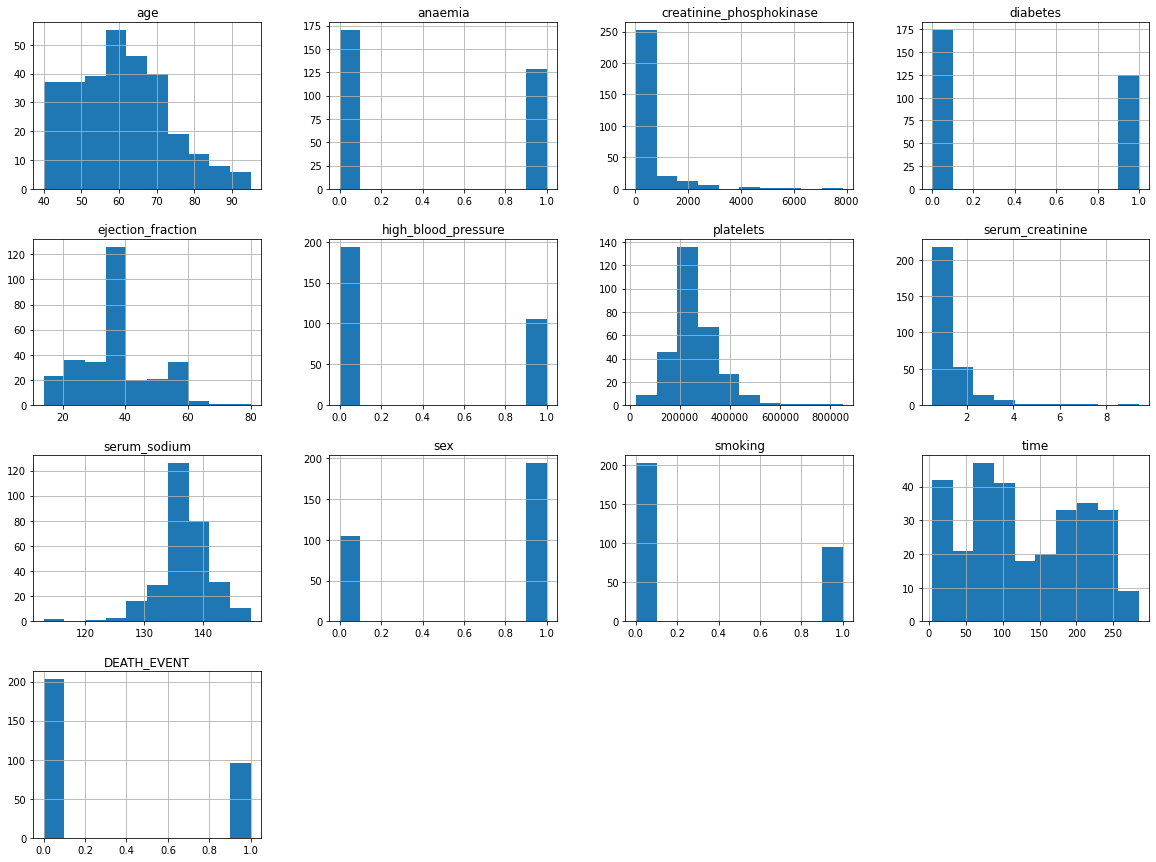

In [9]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

# Preprocessing  the data

In [10]:
y = df['DEATH_EVENT']
X =  df.drop(['DEATH_EVENT'],axis=1)

In [14]:
X['serum_sodium'] = X['serum_sodium'] > 130
X['creatinine_phosphokinase'] = X['creatinine_phosphokinase'] < 4000
X['serum_creatinine'] = X['serum_creatinine'] < 4
X['ejection_fraction'] = X['ejection_fraction'] < 60
X['platelets'] = X['platelets'] < 500000
X['age'] = X['age'] < 80

C:\Users\Admin\AppData\Local\Temp/ipykernel_3084/250178608.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X.hist(ax=ax)


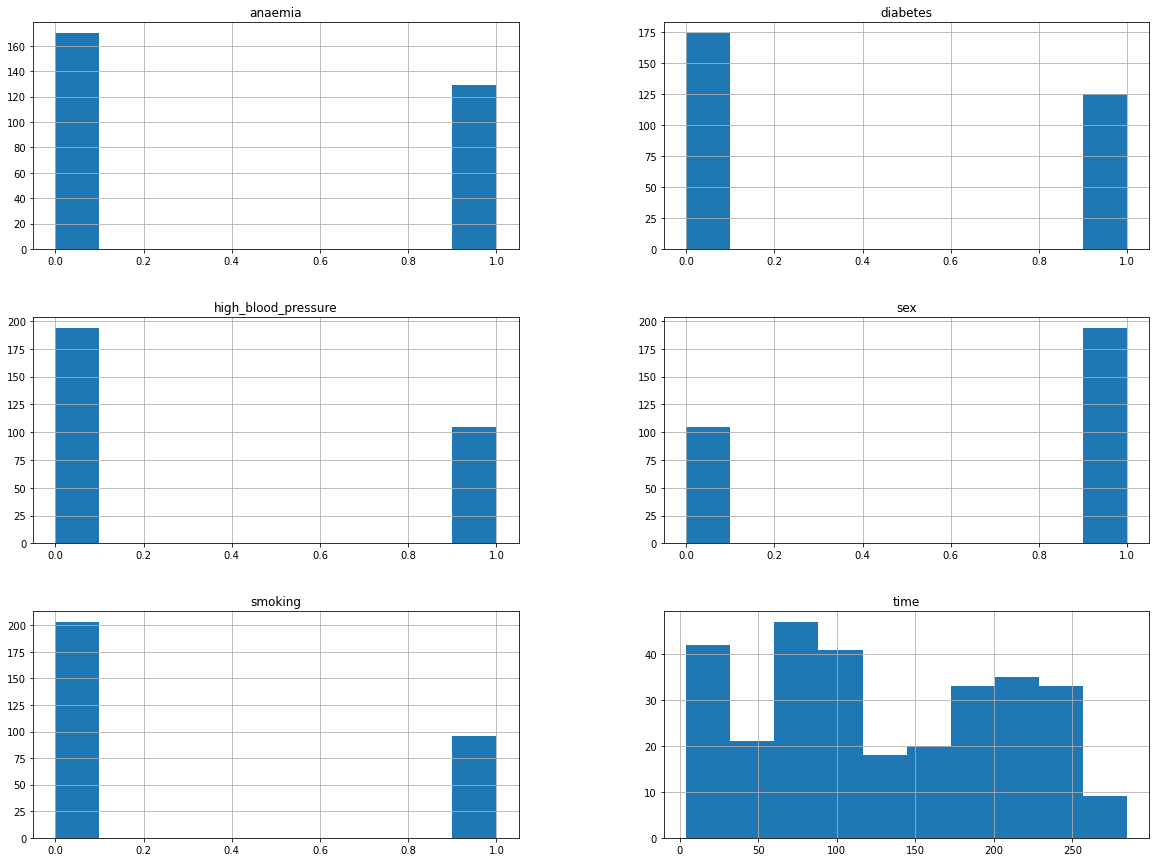

In [15]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
X.hist(ax=ax)
plt.show()

In [16]:
X.dropna(inplace=True,axis=1)

### Split the data 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4)

# Building model using XGBosst 

In [18]:
#Using xgboost
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=10,) #random_state=10)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[74  4]
 [14 28]]


In [20]:
accuracy_score(y_test,y_pred)

0.85